In [20]:
#program to classify dots belonging to class 0 and 1
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn

In [21]:
# non- linear dataset
n_sample = 1000

X, Y = make_circles(n_sample, noise=0.03 ,random_state=42)

print(f'First few samples X : \n {X[:10]}')
print(f'First few samples Y : \n {Y[:10]}')

First few samples X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
First few samples Y : 
 [1 1 1 1 0 1 1 1 1 0]


In [22]:
data = pd.DataFrame({'X1':X[:,0], 'X2':X[:,1] ,'Y':Y})
data

,X1,X2,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [23]:
data['Y'].value_counts()

Y
1    500
0    500
Name: count, dtype: int64

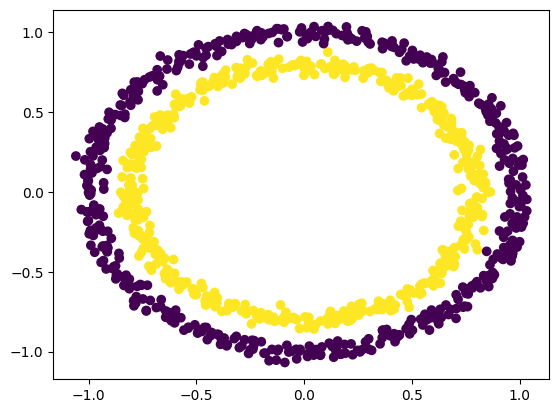

In [24]:
plt.scatter(x=X[:,0], 
            y=X[:,1], 
            c=Y)
plt.show()

In [25]:
X.shape, Y.shape

((1000, 2), (1000,))

In [26]:
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)
type(X), type(Y)

(torch.Tensor, torch.Tensor)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [28]:
#Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
#Constructing a model by subclassing nn.Module.
#Defining a loss function and optimizer.
#Creating a training loop

In [29]:
#device = "cpu"

In [30]:
class CircleModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

        self.relu = nn.ReLU() #NL
    def forward(self, x):
        #  return self.layer_3(self.layer_2(self.layer_1(x))
        return self.layer_3(self.layer_2(self.relu(self.layer_1(x)))) #NL

model = CircleModel()
model


CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [31]:
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)


In [32]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [33]:
# Going from raw model outputs to predicted labels 
# row outputs -> sigmoid -> binary 0/1 by rounding off
# logits -> prediction probabilities -> prediction labels


#And the use of the sigmoid activation function is not required 
#when passing our model's raw outputs to the nn.BCEWithLogitsLoss 
#(the "logits" in logits loss is because it works on the model's raw logits output), 
#this is because it has a sigmoid function built-in.

In [34]:
## Understanding epoch

# Mathematically, we can understand it as follows;

#Total number of training examples = 3000;
#Assume each batch size = 500;
#Then the total number of Iterations = Total number of training examples/Individual batch size = 3000/500
#Total number of iterations = 6
#And 1 Epoch = 6 Iterations

# There are a few important points that everyone should keep in mind during training a machine learning model. These are as follows:

#Epoch is a machine learning terminology that refers to the number of 
#passes the training data goes through machine learning algorithm during the entire data points.

#If there is a large amount of data available, then you can divide entire 
#data sets into common groups or batches.

#The process of running one batch through the learning model is known as iteration. 
#In Machine Learning, one cycle in entire training data sets is called an Epoch. 
#However, in ideal conditions, one cycle in entire training data sets is called an 
#Epoch but training a model typically requires multiple numbers of Epochs.

#Better generalization can be achieved with new inputs by using more epochs in the 
#training of the machine learning model.

In [35]:
# Loss function - refers to error of one training example
# Cost function - calculates the average error across an entire training set

In [36]:
#SGD - randomly selects subset of dataset at every step rather than full dataset

In [37]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

    ##Training
    model.train()

    # 1. Forward
    y_logits = model(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    
    # 2. Loss
    train_loss = loss_func(y_logits, y_train)
    train_acc = accuracy_fn(y_train, y_pred)
    
    # 3. Optimizer
    
    optimizer.zero_grad()
    
    # 4. Backward
    train_loss.backward() 
    
    # 5. Optimizer step
    optimizer.step()

    ##Testing

    model.eval()

    with torch.inference_mode():

        # 1. Forward
        test_logits = model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Loss
        test_loss = loss_func(test_logits, y_test)
        test_accu = accuracy_fn(y_test, test_pred)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Train Loss : {train_loss} , Train accu : {train_acc} | Test Loss : {test_loss} , Test Accu : {test_accu}")



Epoch 0 | Train Loss : 0.6944103837013245 , Train accu : 50.0 | Test Loss : 0.6941156983375549 , Test Accu : 50.0
Epoch 10 | Train Loss : 0.6926828026771545 , Train accu : 50.0 | Test Loss : 0.6925651431083679 , Test Accu : 50.0
Epoch 20 | Train Loss : 0.6919642090797424 , Train accu : 50.0 | Test Loss : 0.6918827891349792 , Test Accu : 50.0
Epoch 30 | Train Loss : 0.6915724873542786 , Train accu : 50.0 | Test Loss : 0.6914721727371216 , Test Accu : 50.0
Epoch 40 | Train Loss : 0.6912891268730164 , Train accu : 49.625 | Test Loss : 0.6911455392837524 , Test Accu : 48.5
Epoch 50 | Train Loss : 0.691040575504303 , Train accu : 50.875 | Test Loss : 0.690844714641571 , Test Accu : 52.0
Epoch 60 | Train Loss : 0.6908026933670044 , Train accu : 51.74999999999999 | Test Loss : 0.6905493140220642 , Test Accu : 51.5
Epoch 70 | Train Loss : 0.6905662417411804 , Train accu : 51.37500000000001 | Test Loss : 0.6902534365653992 , Test Accu : 52.0
Epoch 80 | Train Loss : 0.6903283596038818 , Train ac

In [38]:
from helper_functions import plot_predictions, plot_decision_boundary

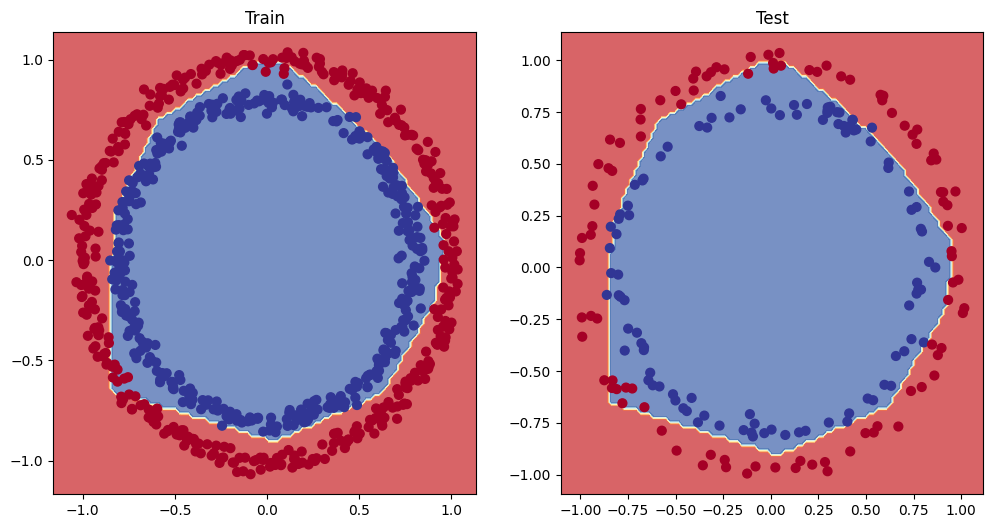

In [39]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train) 
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test) 

In [ ]:
# ReLU - where negative values are replaced with 0 and positive stay same
# Sigmoid - 1/1 + exp(-x)